# 1.Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 2.Import Dataset

In [2]:
wine=pd.read_csv('wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# 3.Data Understanding

In [3]:
wine.shape

(178, 14)

In [4]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
wine.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [12]:
labels=wine.Type.value_counts()

In [13]:
values=wine.Type.value_counts().values

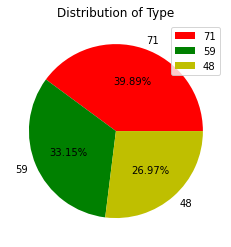

In [17]:
plt.pie(values,labels=labels,autopct='%1.2f%%',colors=['r','g','y'])
plt.legend(labels)
plt.title('Distribution of Type')
plt.show()

In [18]:
corr_matrix=wine.corr()

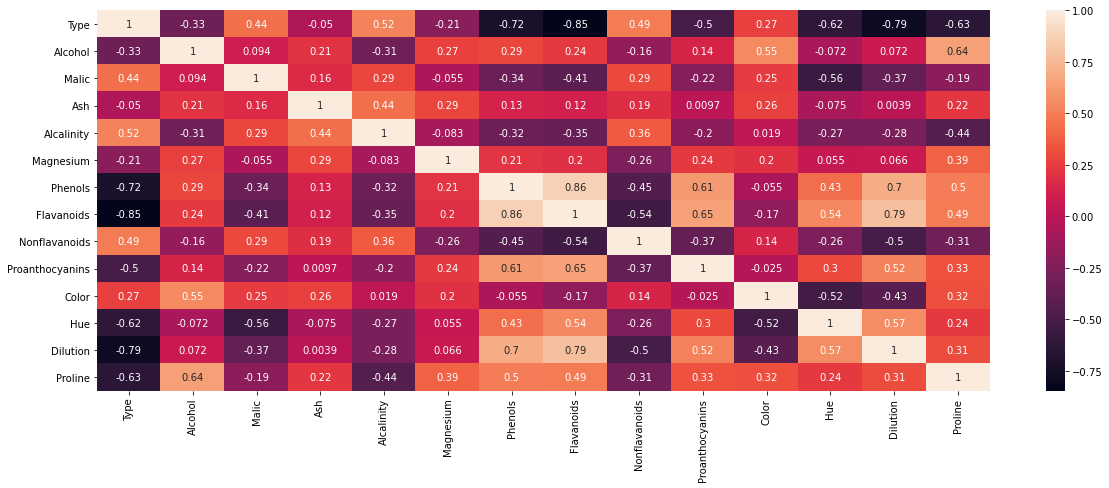

In [20]:
plt.figure(figsize=(20,7))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [21]:
X=wine.drop('Type',axis=1)
y=wine[['Type']]

# Standarising data before PCA

In [25]:
std_scaler=StandardScaler()
X_scaled=std_scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# Building PCA

In [30]:
pca=PCA(n_components=3)

In [31]:
X_transformed=pca.fit_transform(X_scaled)

In [32]:
variance=pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631])

In [41]:
#cummulative varaince
var=np.cumsum(np.round(a = variance,decimals=4)*100)

In [42]:
df=pd.DataFrame(data=X_transformed,columns=['PC1','PC2','PC3'])
df

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [43]:
df.shape

(178, 3)

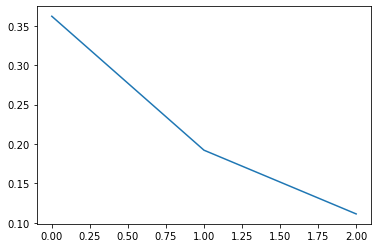

In [44]:
# Variance plot for 3 PCA components obtained 
plt.plot(variance)
plt.show()

<AxesSubplot:>

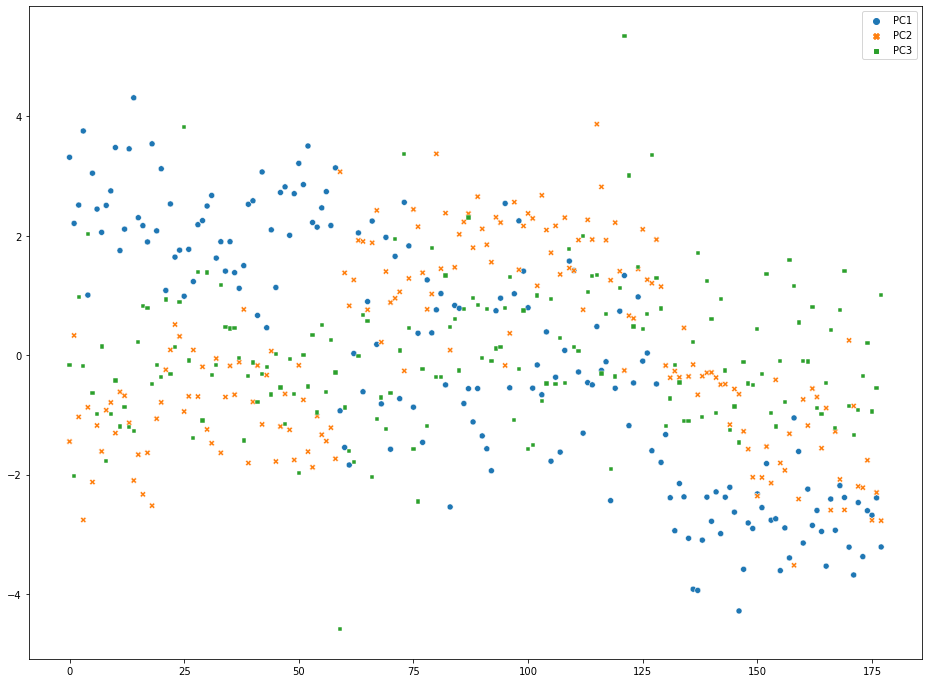

In [55]:
# Visualization of PCAs
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=df)

# Building Clustering algorithms

# 1.Heirarchial 

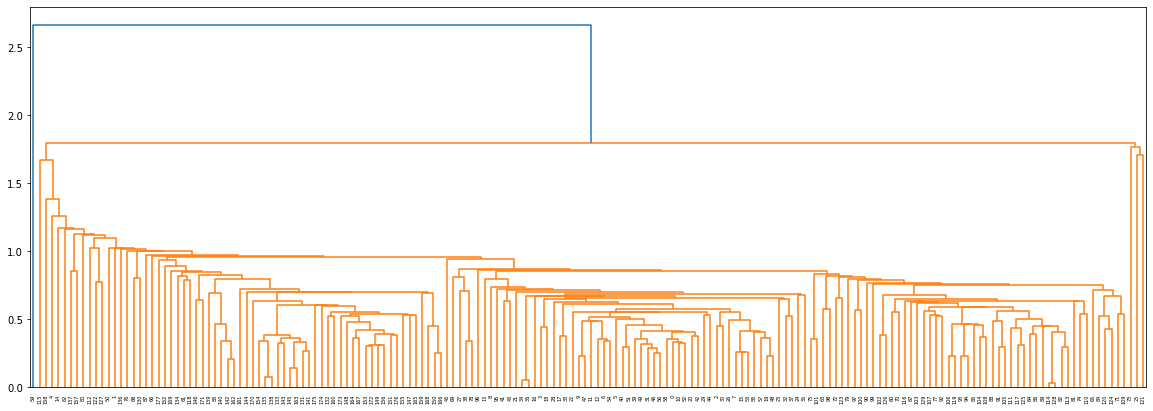

In [53]:
plt.figure(figsize=(20,7))
dendogram=sch.dendrogram(sch.linkage(df,method='single', metric='euclidean'))
plt.show()

In [56]:
cluster=AgglomerativeClustering(n_clusters=3)

In [58]:
label=pd.DataFrame(cluster.fit_predict(df),columns=['clustersid_H'])
label['clustersid_H'].value_counts()

0    66
2    65
1    47
Name: clustersid_H, dtype: int64

In [60]:
df1=df.copy()
df1['label']=label

# KMeans

## Elbow Method

In [70]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=99)
    labels=model.fit_predict(df)
    wcss.append(model.inertia_)
wcss

[1539.5034801883057,
 886.1611364823486,
 512.9995067661513,
 429.6196798263025,
 370.5953153508112,
 324.8920812493097,
 288.7812013627297,
 260.94167812383864,
 238.73330228580676,
 213.68674599920723]

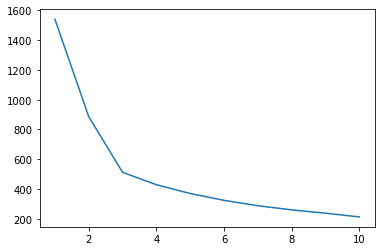

In [71]:
plt.plot(range(1,11),wcss)
plt.show()

### It showing after 3 there is less decrease so go with 3

## 2.Silhoette Score

In [68]:
sc=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=56)
    labels=model.fit_predict(df)
    score=silhouette_score(df,labels)
    sc.append(score)
sc

[0.3893881308900331,
 0.4537999848257614,
 0.41130506566811015,
 0.35977626008612656,
 0.30939712898745436,
 0.3145317260856047,
 0.2851981362729711,
 0.29492248044397557,
 0.28825902687511823]

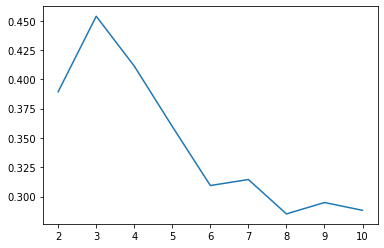

In [69]:
plt.plot(range(2,11),sc)
plt.show()

### We can see peak for no.of clusters =3

## 3.Calinski harabasz score

In [72]:
values=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=99)
    labels = model.fit_predict(df)
    calinski=calinski_harabasz_score(df,labels)
    values.append(calinski)
values    

[129.75998129267862,
 175.08612871899334,
 149.83778314583404,
 136.41639825199962,
 128.60464915868195,
 123.434575305875,
 118.9951212271634,
 115.10237467956297,
 115.8170991021049]

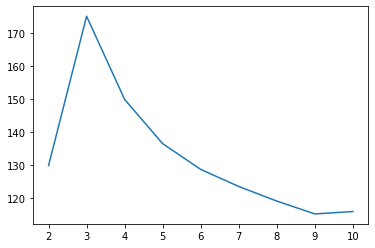

In [73]:
plt.plot(range(2,11),values)
plt.show()

### even this shows that optimal value is 3

In [74]:
final_kmeans=KMeans(n_clusters=3,random_state=99)
labels=final_kmeans.fit_predict(df)

In [77]:
clusterkmeans=pd.DataFrame(data=labels)
df2=df.copy()
df2['kmeans_clusters']=clusterkmeans
df2

,PC1,PC2,PC3,kmeans_clusters
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


In [80]:
df2['kmeans_clusters'].value_counts()

0    64
1    63
2    51
Name: kmeans_clusters, dtype: int64

In [79]:
wine_class = wine['Type']
wine_class = pd.Series(wine_class)
clustersid_HC = cluster.labels_
clustersid_HC = pd.Series(clustersid_HC)
clusterid_Kmeans = final_kmeans.labels_
clusterid_Kmeans = pd.Series(clusterid_Kmeans)
pred_df = pd.concat([wine_class, clustersid_HC, clusterid_Kmeans],axis = 1)
pred_df

,Type,0,1
0,1,2,1
1,1,2,1
2,1,2,1
3,1,2,1
4,1,2,1
...,...,...,...
173,3,1,2
174,3,1,2
175,3,1,2
176,3,1,2
